In [ ]:
#!/usr/bin/env python3
# -*- coding : utf-8 -*-

In [ ]:
# import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

In [ ]:
data_df = pd.read_csv('/content/breast_cancer_mod.csv')
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0


In [ ]:
data_df['target'].value_counts().values

array([357, 212])

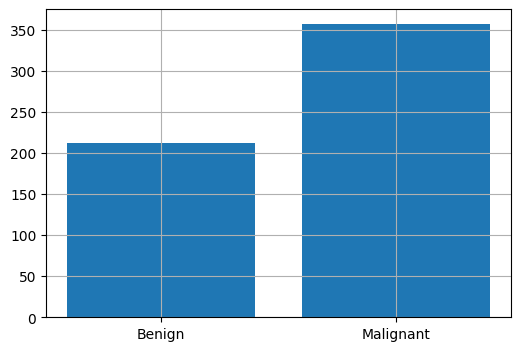

In [ ]:
labels = ["Malignant", "Benign"]

fig, ax = plt.subplots(figsize = (6, 4))

ax.bar(data_df["target"].value_counts().index,
       data_df["target"].value_counts().values)

ax.set_xticks(data_df["target"].value_counts().index)
ax.set_xticklabels(labels)
ax.grid();

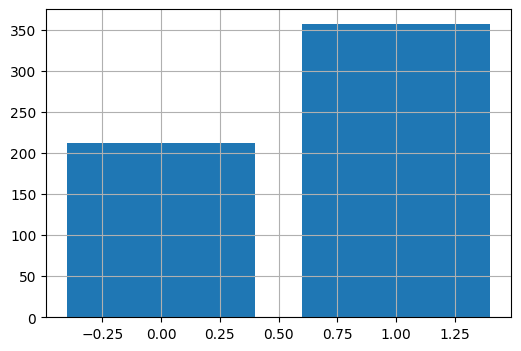

In [ ]:
class_labels = ['Malignant', 'Benign']

fig, ax = plt.subplots(figsize = (6,4))

ax.bar(data_df['target'].value_counts().index, data_df['target'].value_counts().values)

# ax.set_xticks

ax.grid()

plt.show()

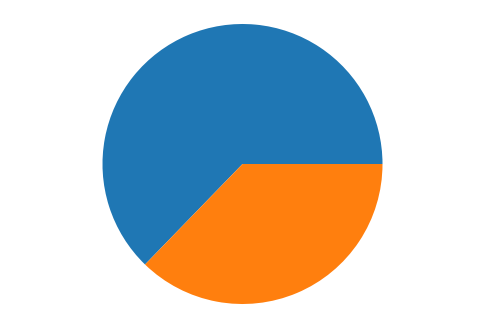

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

ax.pie(data_df['target'].value_counts())

ax.axis('equal')

plt.show()

In [ ]:
features = data_df.drop('target', axis=1)
labels = data_df['target']
features.shape, labels.shape

((569, 30), (569,))

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(features, labels, test_size=TEST_SIZE, stratify=labels, random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 146 to 345
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              455 non-null    int64
 1   mean texture             455 non-null    int64
 2   mean perimeter           455 non-null    int64
 3   mean area                455 non-null    int64
 4   mean smoothness          455 non-null    int64
 5   mean compactness         455 non-null    int64
 6   mean concavity           455 non-null    int64
 7   mean concave points      455 non-null    int64
 8   mean symmetry            455 non-null    int64
 9   mean fractal dimension   455 non-null    int64
 10  radius error             455 non-null    int64
 11  texture error            455 non-null    int64
 12  perimeter error          455 non-null    int64
 13  area error               455 non-null    int64
 14  smoothness error         455 non-null    int64
 15  compactne

In [ ]:
data_df['total'] = data_df.astype(np.int16).sum(axis=1)
data_df.sort_values('total', inplace=True)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,total
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,0,12
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,13
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,0,13
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,14
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,14


In [ ]:
X_train['total'] = X_train.astype(np.int16).sum(axis=1)
X_train.sort_values('total', inplace=True)
X_test['total'] = X_test.astype(np.int16).sum(axis=1)
X_test.sort_values('total', inplace=True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,14
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,14
12,0,0,0,1,1,0,1,1,0,1,...,0,0,1,1,0,0,0,0,1,16
18,1,1,1,1,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,0,18
35,0,1,0,0,1,1,0,0,1,1,...,1,0,0,0,1,1,0,1,1,20


Index(['count'], dtype='object')
              count
total target       
12    0           1
13    0           2
14    0           2
15    0           4
16    0           5
17    0           4
18    0           3
19    0           4
20    0          13
21    0          10
      1           2
22    0          13
23    0          21
24    0          21
      1           1
25    0          18
      1           2
26    0          20
      1           2
27    0          18
      1           5
28    0          25
      1          20
29    0          18
      1          39
30    0          10
      1          60
31    1         226


<Axes: xlabel='total'>

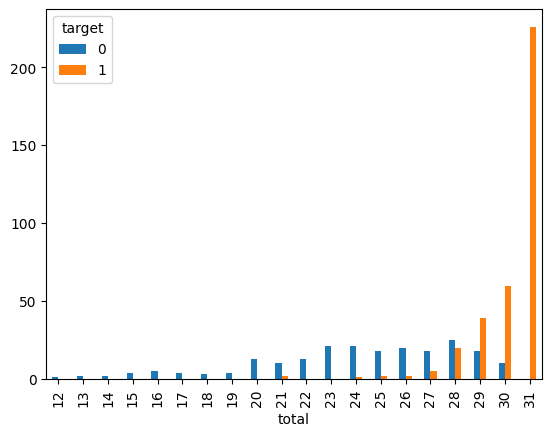

In [ ]:
tmp_df = data_df.groupby(['total', 'target']).agg({'target':'count'})

tmp_df.columns = ['count']

print(tmp_df.columns)
print(tmp_df)

tmp_df.reset_index(inplace=True)

tmp_df.pivot(index='total', columns='target', values='count').plot(kind='bar')

In [ ]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,total
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,0,12
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,13
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,0,13
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,14
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,14


In [ ]:
accuracy = {}

X_train['target'] = y_train

for b in range(X_train.shape[1]):
  X_train['pred'] = X_train['total'] >=b
  accuracy[b] = accuracy_score(X_train['pred'], X_train['target'])

In [ ]:
best_b = max(accuracy, key=accuracy.get)
best_b

31

In [ ]:
X_test['pred'] = X_test['total'] >= best_b
X_test['target'] = y_test
accuracy_score(X_test['pred'] , X_test['target'])

0.3684210526315789